# Imports:
- Numpy: data and arrays management
- Pandas: handling csv files and importing data into numpy arrays
- Pyplot: ploting data and visualization
- Sonify: for sonification, creates a mapping between data and pitch (frequency)

In [2]:
import numpy as np
import pandas as pd
from sonipy.sonify import SonifyTool
import matplotlib.pyplot as plt

print('imported')

imported


In [3]:
data = pd.read_csv("SWaT.Dataset/SWaT_Dataset_Attack_v0.csv", sep=';')
data

C:\Users\madia\.conda\envs\deeplearning\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (1,9,28,46) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
0,28/12/2015 10:00:00 AM,"2,427057","522,8467",2,2,1,"262,0161","8,396437","328,6337","2,445391",...,2,1,"250,8652","1,649953","189,5988","0,000128152",1,1,1,Normal
1,28/12/2015 10:00:01 AM,"2,446274","522,886",2,2,1,"262,0161","8,396437","328,6337","2,445391",...,2,1,"250,8652","1,649953","189,6789","0,000128152",1,1,1,Normal
2,28/12/2015 10:00:02 AM,"2,489191","522,8467",2,2,1,"262,0161","8,394514","328,6337","2,442316",...,2,1,"250,8812","1,649953","189,6789","0,000128152",1,1,1,Normal
3,28/12/2015 10:00:03 AM,"2,53435","522,9645",2,2,1,"262,0161","8,394514","328,6337","2,442316",...,2,1,"250,8812","1,649953","189,6148","0,000128152",1,1,1,Normal
4,28/12/2015 10:00:04 AM,"2,56926","523,4748",2,2,1,"262,0161","8,394514","328,6337","2,443085",...,2,1,"250,8812","1,649953","189,5027","0,000128152",1,1,1,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449914,2/1/2016 2:59:55 PM,"2,559972","519,5495",2,2,1,"168,0979","8,638683","301,9226","2,459488",...,2,1,"251,1535","0,8650241","189,022",0,1,1,1,Normal
449915,2/1/2016 2:59:56 PM,"2,549082","520,4131",2,2,1,"168,0979","8,638683","301,9226","2,459488",...,2,1,"251,0734","0,8650241","188,9259",0,1,1,1,Normal
449916,2/1/2016 2:59:57 PM,"2,531467","520,6878",2,2,1,"168,0979","8,638683","301,9226","2,460129",...,2,1,"251,0734","0,8650241","188,9259",0,1,1,1,Normal
449917,2/1/2016 2:59:58 PM,"2,521218","520,7271",2,2,1,"168,0979","8,638683","301,9226","2,460129",...,2,1,"251,0734","0,8650241","188,9259",0,1,1,1,Normal


# ----------------------------------------------------------------------
# **_LIT101 Attack:_**

- 28/12/2015 Start: 11:22:00, end: 11:28:22, station: LIT101
- Normal state: Water level between L and H, Anomaly: Increase by 1 mm every second

In [31]:
start_index = data[data[' Timestamp'] == ' 28/12/2015 11:22:00 AM'].index[0]
end_index   = data[data[' Timestamp'] == ' 28/12/2015 11:28:22 AM'].index[0]
attack_duration = end_index - start_index # in seconds
attack_data = np.array([x.replace(',', '.') for x in data['LIT101'].values[start_index: end_index]])
attack_data = attack_data.astype('float32')
print('Attack duration is: {} s'.format(attack_duration))
print('Assert(Same length): {}'.format(attack_data.shape[0] == attack_duration))

Attack duration is: 382 s
Assert(Same length): True


## Data plot during the attack
- As we can see, there is an increase of 1mm each second

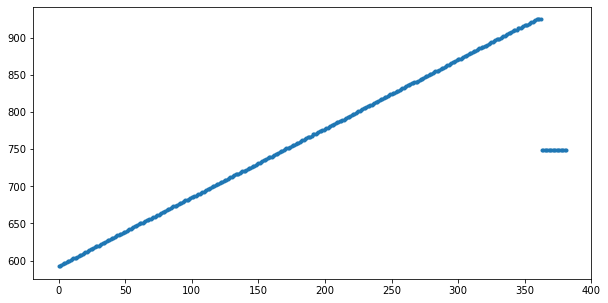

In [32]:
plt.figure(figsize=(10, 5))
plt.scatter(np.arange(attack_duration), attack_data, marker='.')

## Sonification (Output file ./tones/Attack_LIT101_11.22.00.wav)

In [41]:
# default values used by the creators
C4 = 261.6 # Hz
frequency_args = {
  'frequency_min' : C4,
  'frequency_max' : C4*4
}

duration_args = {
  'time_total' : 5000, # ms
  # 'time_min' : 100, # ms
  # 'time_max' : 800, # ms
}

duration_scale = 1. / 5000. # x value / time (ms)

Tone = SonifyTool(np.arange(attack_duration), attack_data,
                  frequency_args = frequency_args,
                  duration_args = duration_args,
                  # duration_scale = duration_scale,
                  # bliplength=0.5
                  )

Tone.play()
Tone.save('.', '/Attack_LIT101_11.22.00.wav')

C:\Users\madia\.conda\envs\deeplearning\lib\site-packages\sonipy\thinkdsp.py:734: UserWarning: Can't add these waveforms; their time arrays don't line up.
  "Can't add these waveforms; their " "time arrays don't line up."
multitones created
Writing /Attack_LIT101_11.22.00.wav
Saved multitone as /Attack_LIT101_11.22.00.wav.


## Ploting the before and after of attack for a better visualization of data
- values of the sensor returns to normal, between L and H

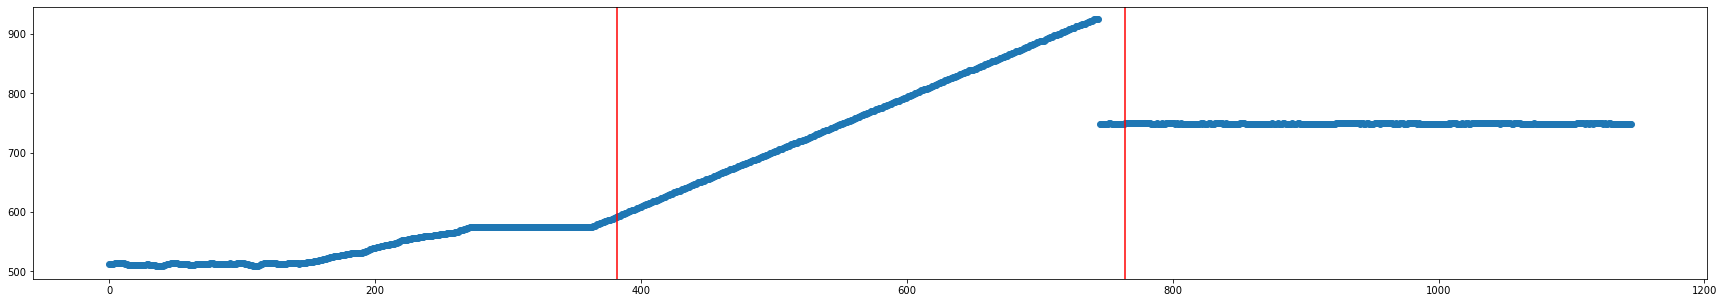

Exception ignored in: <bound method Wave_write.__del__ of <wave.Wave_write object at 0x000001F68F336AC8>>
Traceback (most recent call last):
  File "C:\Users\madia\.conda\envs\deeplearning\lib\wave.py", line 316, in __del__
    self.close()
  File "C:\Users\madia\.conda\envs\deeplearning\lib\wave.py", line 433, in close
    if self._file:
AttributeError: 'Wave_write' object has no attribute '_file'


In [42]:
# displaying twice the length of the attack, as we can see what happens after it
sample = np.array([x.replace(',', '.') for x in data['LIT101'].values[start_index - attack_duration: end_index + attack_duration]])
sample = sample.astype('float32')
plt.figure(figsize=(30, 5))
plt.axvline(attack_duration, 0, 1500, label='Attack start time', color='red')
plt.axvline(attack_duration * 2, 0, 1500, label='Attack end time', color='red')
plt.legend
plt.scatter(np.arange(attack_duration * 3), sample)

## Sonification of a larger sample, including the attack (Output file ./tones/LargeSample_LIT101_10.00.00.wav)
- 28/12/2015 Start: 10:00:00, end: 12:00:00, station: LIT101

In [43]:
lit101_sample_duration = 3600 * 2 # 2 hours (in seconds)
lit101_sample = np.array([x.replace(',', '.') for x in data['LIT101'].values[0: 3600 * 2]])
lit101_sample = lit101_sample.astype('float32')
print('Assert(Same length): {}'.format(lit101_sample.shape[0] == lit101_sample_duration))

Assert(Same length): True


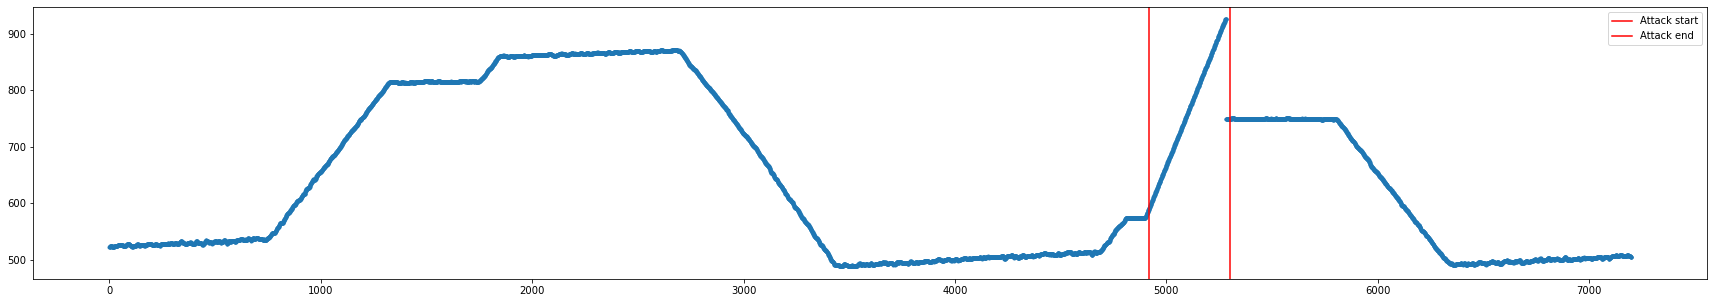

In [44]:
plt.figure(figsize=(30, 5))
# assuming 10:00:00 corresponds to second 0, start time is 4920s and end time is 5302s
plt.axvline(4920, 0, 1000, label='Attack start', color='red')
plt.axvline(5302, 0, 1000, label='Attack end', color='red')
plt.legend()
plt.scatter(np.arange(lit101_sample_duration), lit101_sample, marker='.')

In [45]:
C4 = 261.6 # Hz
frequency_args = {
  'frequency_min' : C4,
  'frequency_max' : C4*4
}

# fixing length to 20s
duration_args = {
  'time_total' : 20000, # ms
  # 'time_min' : 100, # ms
  # 'time_max' : 800, # ms
}

duration_scale = 1. / 5000. # x value / time (ms)

Tone = SonifyTool(np.arange(lit101_sample_duration), lit101_sample,
                  frequency_args = frequency_args,
                  duration_args = duration_args,
                  # duration_scale = duration_scale,
                  # bliplength=0.5
                  )

Tone.play()
Tone.save('.', 'LargeSample_LIT101_10.00.00.wav')

C:\Users\madia\.conda\envs\deeplearning\lib\site-packages\sonipy\thinkdsp.py:734: UserWarning: Can't add these waveforms; their time arrays don't line up.
  "Can't add these waveforms; their " "time arrays don't line up."
multitones created
Writing .\tones/LargeSample_LIT101_10.00.00.wav
Saved multitone as .\tones/LargeSample_LIT101_10.00.00.wav.


# ----------------------------------------------------------------------
# **_LIT301 Attack:_**
- 28/12/2015 Start: 12:08:25, end: 12:15:33, station: LIT301
- Normal state: Water level between L and H, Anomaly: Water level increased above HH


In [46]:
start_index = data[data[' Timestamp'] == ' 28/12/2015 12:08:25 PM'].index[0]
end_index   = data[data[' Timestamp'] == ' 28/12/2015 12:15:33 PM'].index[0]
attack_duration = end_index - start_index # in seconds
attack_data = np.array([x.replace(',', '.') for x in data['LIT301'].values[start_index: end_index]])
attack_data = attack_data.astype('float32')
print('Attack duration is: {} s'.format(attack_duration))
print('Assert(Same length): {}'.format(attack_data.shape[0] == attack_duration))

Attack duration is: 428 s
Assert(Same length): True


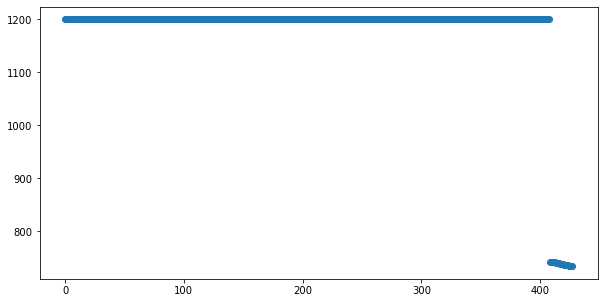

In [47]:
plt.figure(figsize=(10, 5))
plt.scatter(np.arange(attack_duration), attack_data)

## Sonification (Output file ./tones/Attack_LIT301_12.08.25.wav)

In [48]:
# default values used by the creators
C4 = 261.6 # Hz
frequency_args = {
  'frequency_min' : C4,
  'frequency_max' : C4*4
}

duration_args = {
  'time_total' : 5000, # ms
  # 'time_min' : 100, # ms
  # 'time_max' : 800, # ms
}

duration_scale = 1. / 5000. # x value / time (ms)

Tone = SonifyTool(np.arange(attack_duration), attack_data,
                  frequency_args = frequency_args,
                  # duration_args = duration_args,
                  # duration_scale = duration_scale,
                  # bliplength=0.5
                  )

Tone.play()
Tone.save('.', 'Attack_LIT301_12.08.25.wav')

C:\Users\madia\.conda\envs\deeplearning\lib\site-packages\sonipy\thinkdsp.py:734: UserWarning: Can't add these waveforms; their time arrays don't line up.
  "Can't add these waveforms; their " "time arrays don't line up."
multitones created
Writing .\tones/Attack_LIT301_12.08.25.wav
Saved multitone as .\tones/Attack_LIT301_12.08.25.wav.


## Ploting the before and after of attack for a better visualization of data
- values of the sensor returns to normal, between L and H

Total duration: 1284 s
Assert(Same length): True


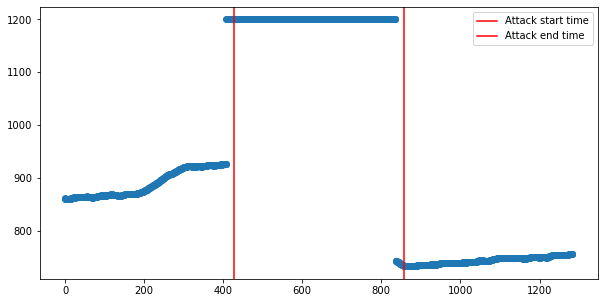

In [49]:
sample = np.array([x.replace(',', '.') for x in data['LIT301'].values[start_index - attack_duration: end_index + attack_duration]])
sample = sample.astype('float32')
print('Total duration: {} s'.format(attack_duration * 3))
print('Assert(Same length): {}'.format(sample.shape[0] == attack_duration * 3))

plt.figure(figsize=(10, 5))
plt.axvline(attack_duration, 0, 1500, label='Attack start time', color='red')
plt.axvline(attack_duration * 2, 0, 1500, label='Attack end time', color='red')
plt.legend()
plt.scatter(np.arange(attack_duration * 3), sample)

## Sonification of a larger sample, including the attack (Output file ./tones/LargeSample_LIT301_11.00.00.wav)
- 28/12/2015 Start: 11:00:00, end: 13:00:00, station: LIT301

In [50]:
lit301_sample_duration = 3600 * 2 # 2 hours (in seconds)
start_index = data[data[' Timestamp'] == ' 28/12/2015 11:00:00 AM'].index[0]
end_index = start_index + lit301_sample_duration
lit301_sample = np.array([x.replace(',', '.') for x in data['LIT301'].values[start_index: end_index]])
lit301_sample = lit301_sample.astype('float32')
print('Assert(Same length): {}'.format(lit301_sample.shape[0] == lit301_sample_duration))

Assert(Same length): True


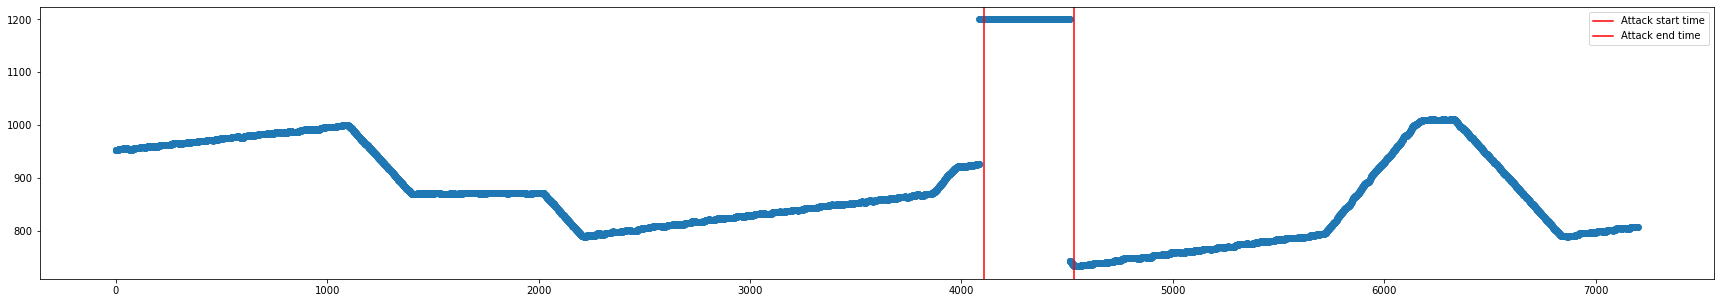

In [51]:
plt.figure(figsize=(30, 5))
# 12:08:25 -> 3600 + 8 * 60 + 25 = 4105 s
# 12:15:33 -> 4105 + 35 + 6 * 60 + 33 = 4533 s
plt.axvline(4105, 0, 1500, label='Attack start time', color='red')
plt.axvline(4533, 0, 1500, label='Attack end time', color='red')
plt.legend()
plt.scatter(np.arange(lit301_sample_duration), lit301_sample)

In [52]:
C4 = 261.6 # Hz
frequency_args = {
  'frequency_min' : C4,
  'frequency_max' : C4*4
}

# fixing length to 20s
duration_args = {
  'time_total' : 20000, # ms
  # 'time_min' : 100, # ms
  # 'time_max' : 800, # ms
}

duration_scale = 1. / 5000. # x value / time (ms)

Tone = SonifyTool(np.arange(lit301_sample_duration), lit301_sample,
                  frequency_args = frequency_args,
                  duration_args = duration_args,
                  # duration_scale = duration_scale,
                  # bliplength=0.5
                  )

Tone.play()
Tone.save('.', 'LargeSample_LIT301_11.00.00.wav')

C:\Users\madia\.conda\envs\deeplearning\lib\site-packages\sonipy\thinkdsp.py:734: UserWarning: Can't add these waveforms; their time arrays don't line up.
  "Can't add these waveforms; their " "time arrays don't line up."
multitones created
Writing .\tones/LargeSample_LIT301_11.00.00.wav
Saved multitone as .\tones/LargeSample_LIT301_11.00.00.wav.


# ----------------------------------------------------------------------
# **_AIT202 Attack:_**
- 28/12/2015 Start: 12:00:55, end: 12:04:10, station: AIT202
- Normal state: Value of AIT-202 is >7.0, Anomaly: Set value of AIT-202 as 6


In [4]:
start_index = data[data[' Timestamp'] == ' 28/12/2015 12:00:55 PM'].index[0]
end_index   = data[data[' Timestamp'] == ' 28/12/2015 12:04:10 PM'].index[0]
attack_duration = end_index - start_index
attack_data = np.array([x.replace(',', '.') for x in data['AIT202'].values[start_index: end_index]])
attack_data = attack_data.astype('float32')
print('Attack duration: {} s'.format(attack_duration))
print('Assert(Same length): {}'.format(attack_data.shape[0] == attack_duration))

Attack duration: 195 s
Assert(Same length): True


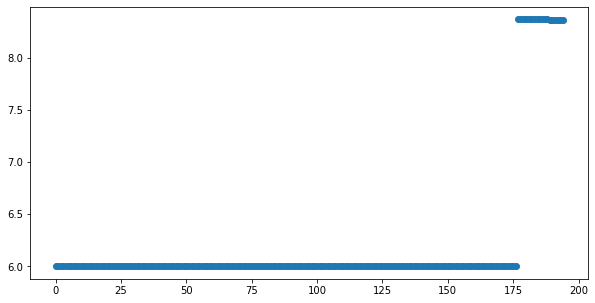

In [5]:
plt.figure(figsize=(10, 5))
plt.scatter(np.arange(attack_duration), attack_data)

## Sonification (Output file ./tones/AIT202/Attack_AIT202_12.00.55.wav)

In [56]:
# default values used by the creators
C4 = 261.6 # Hz
frequency_args = {
  'frequency_min' : C4,
  'frequency_max' : C4*4
}

duration_args = {
  'time_total' : 5000, # ms
  # 'time_min' : 100, # ms
  # 'time_max' : 800, # ms
}

duration_scale = 1. / 5000. # x value / time (ms)

Tone = SonifyTool(np.arange(attack_duration), attack_data,
                  frequency_args = frequency_args,
                  # duration_args = duration_args,
                  # duration_scale = duration_scale,
                  # bliplength=0.5
                  )

Tone.play()
Tone.save('.', 'Attack_AIT202_12.00.55.wav')

C:\Users\madia\.conda\envs\deeplearning\lib\site-packages\sonipy\thinkdsp.py:734: UserWarning: Can't add these waveforms; their time arrays don't line up.
  "Can't add these waveforms; their " "time arrays don't line up."
multitones created
Writing .\tones/Attack_AIT202_12.00.55.wav
Saved multitone as .\tones/Attack_AIT202_12.00.55.wav.


## Ploting the before and after of attack for a better visualization of data
- values of the sensor returns to > 7.05

Total duration: 585 s
Assert(Same length): True


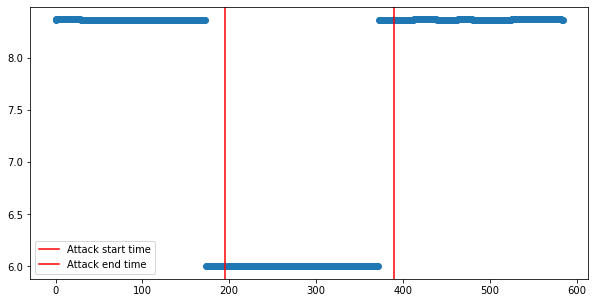

In [7]:
sample = np.array([x.replace(',', '.') for x in data['AIT202'].values[start_index - attack_duration: end_index + attack_duration]])
sample = sample.astype('float32')
print('Total duration: {} s'.format(attack_duration * 3))
print('Assert(Same length): {}'.format(sample.shape[0] == attack_duration * 3))

plt.figure(figsize=(10, 5))
plt.axvline(attack_duration, 0, 10, label='Attack start time', color='red')
plt.axvline(attack_duration * 2, 0, 10, label='Attack end time', color='red')
plt.legend()
plt.scatter(np.arange(attack_duration * 3), sample)

## Sonification of a larger sample, including the attack (Output file ./tones/LargeSample_AIT202_11.00.00.wav)
- 28/12/2015 Start: 11:00:00, end: 13:00:00, station: AIT202

In [9]:
ait202_sample_duration = 3600 * 2 # 2 hours (in seconds)
start_index = data[data[' Timestamp'] == ' 28/12/2015 11:00:00 AM'].index[0]
ait202_sample = np.array([x.replace(',', '.') for x in data['AIT202'].values[start_index: start_index + ait202_sample_duration]])
ait202_sample = ait202_sample.astype('float32')
print('Assert(Same length): {}'.format(ait202_sample.shape[0] == ait202_sample_duration))

Assert(Same length): True


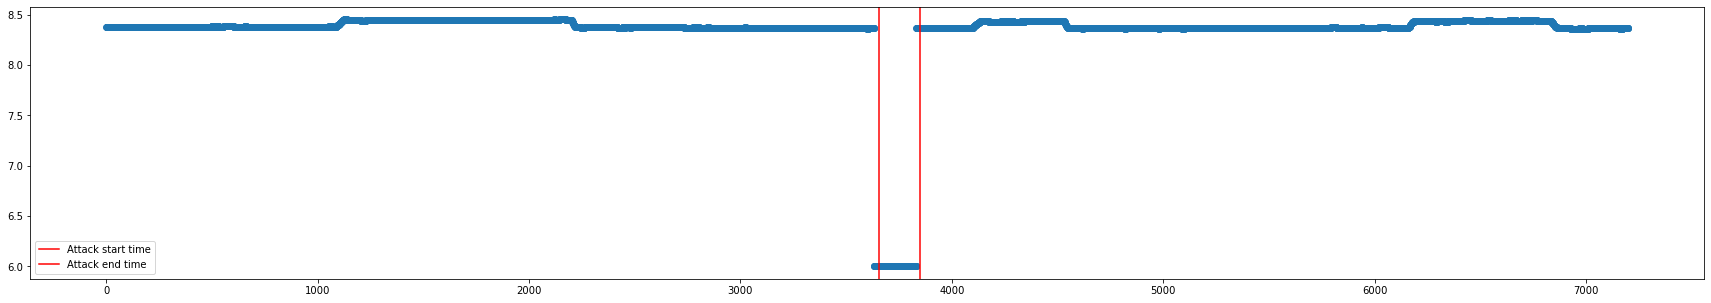

In [12]:
plt.figure(figsize=(30, 5))
# assuming 11:00:00 -> 0s, we have:
# 12:00:55 -> 3600 + 55 = 3655s
# 12:04:10 -> 3655s + attack_duration
plt.axvline(3655, 0, 10, label='Attack start time', color='red')
plt.axvline(3655 + attack_duration, 0, 10, label='Attack end time', color='red')
plt.legend()
plt.scatter(np.arange(ait202_sample_duration), ait202_sample)

In [13]:
C4 = 261.6 # Hz
frequency_args = {
  'frequency_min' : C4,
  'frequency_max' : C4*4
}

# fixing length to 20s
duration_args = {
  'time_total' : 20000, # ms
  # 'time_min' : 100, # ms
  # 'time_max' : 800, # ms
}

duration_scale = 1. / 5000. # x value / time (ms)

Tone = SonifyTool(np.arange(ait202_sample_duration), ait202_sample,
                  frequency_args = frequency_args,
                  duration_args = duration_args,
                  # duration_scale = duration_scale,
                  # bliplength=0.5
                  )

Tone.play()
Tone.save('.', 'LargeSample_AIT202_11.00.00.wav')

C:\Users\madia\.conda\envs\deeplearning\lib\site-packages\sonipy\thinkdsp.py:734: UserWarning: Can't add these waveforms; their time arrays don't line up.
  "Can't add these waveforms; their " "time arrays don't line up."
multitones created
Writing .\tones/LargeSample_AIT202_11.00.00.wav
Saved multitone as .\tones/LargeSample_AIT202_11.00.00.wav.
